# Приоритизация гипотез, запуск A/B-теста и анализ результатов

## Содержание:

1. Изучение общей информации, предварительный просмотр данных

- 1.1 Импортируем все нужные библиотеки

- 1.2 Загрузка файла и предварительный просмотр данны

2. Подготовка данных

- 2.1. Замена названий столбцов

- 2.2. Преобразование данных в нужные типы, обработка пропусков

3. Приоритизация гипотез

 - 3.1. Применение фреймворка ICE для приоритизации гипотез
 - 3.2. Применение фреймворка RICE для приоритизации гипотез

4. Анализ A/B-теста

 - 4.1. График кумулятивной выручки по группам
 - 4.2. График кумулятивного среднего чека по группам
 - 4.3. График относительного изменения кумулятивного среднего чека группы B к группе A
 - 4.4. График кумулятивного среднего количества заказов на посетителя по группам
 - 4.5. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
 - 4.6. Точечный график количества заказов по пользователям
 - 4.7. 95-й и 99-й перцентили количества заказов на пользователя
 - 4.8.Точечный график стоимостей заказов
 - 4.9. 95-й и 99-й перцентили стоимости заказов
 - 4.10. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
 - 4.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
 - 4.12. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
 - 4.13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным
 - 4.14. Решение по результатам теста
5. Общий вывод

<b>Цель исследования</b> - выполнить предобработку данных и изучить их. Приоритизировать гипотезы, запуск A/B-теста и анализ результатов.

<b>Исходные данные</b> - данные интернет-магазина.

**Описание данных**

Файл /datasets/hypothesis.csv
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## 1. Изучение общей информации, предварительный просмотр данных 

#### 1.1. Импортируем все нужные библиотеки

In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy as sp

####  1.2. Загрузка файла и предварительный просмотр данных

In [48]:
try:
    hypothesis = pd.read_csv('D://hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
try:
    orders = pd.read_csv('D://orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
try:
    visitors = pd.read_csv('D://visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [49]:
pd.options.display.max_colwidth = 130
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [50]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [51]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [52]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [53]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [54]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Вывод:** Имеем 3 датафрейма, бросаются в глаза не корректные названия столбцов, типы некоторых ячеек, в последствии все заменим

## 2. Подготовка данных

#### 2.1. Замена названий столбцов 

Приведем все названия столбцов к нижнему регистру

In [55]:
hypothesis.columns = map(str.lower, hypothesis.columns)
orders.columns = orders.columns.str.replace('I', '_i')

#### 2.2. Преобразование данных в нужные типы, обработка пропусков и дубликатов

Изменим формат ячеек с датой

In [56]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим данные на пропуски

In [57]:
hypothesis.isna().sum()
orders.isna().sum()
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Проверим данные на дубликаты и обработаем их

In [58]:
print(orders.duplicated().sum())
print(hypothesis.duplicated().sum())
print(visitors.duplicated().sum())

0
0
0


**Вывод:**
- После первичной обработки данных были выявлены неккоректные названия столбцов, не правильные форматы ячеек, пропуски обнаружены не были,дубликатов также не наблюдается, можно приступать к основной части.

## 3. Приоритизация гипотез

#### 3.1. Применение фреймворка ICE для приоритизации гипотез

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

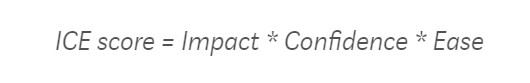

In [59]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
ICE = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)
ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


#### 3.2. Применение фреймворка RICE для приоритизации гипотез

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

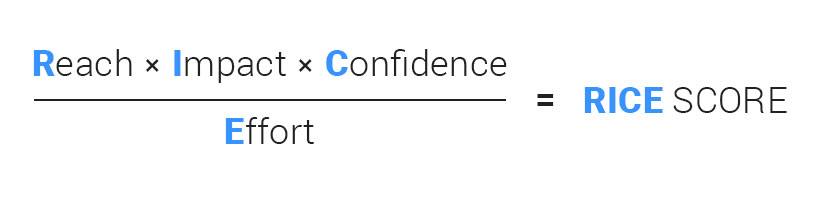

In [60]:
hypothesis['RICE'] = hypothesis['impact'] * hypothesis['reach'] * hypothesis['confidence'] / hypothesis['efforts']
RICE = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).round(2)
pd.options.display.max_colwidth = 130
RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Выводы:**
- Гипотезы "Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар", "Запустить собственную службу доставки, что сократит срок доставки заказов", "Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов", "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей" находятся в обоих случаях в самом низу рейтинга с существенным отрывом
- Объяснить разницу первых мест можно тем, что в RICE учитывается дополнительно параметр Reach, т.е. охват пользователей

## 4. Анализ A/B-теста

#### 4.1. График кумулятивной выручки по группам

Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [61]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [62]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


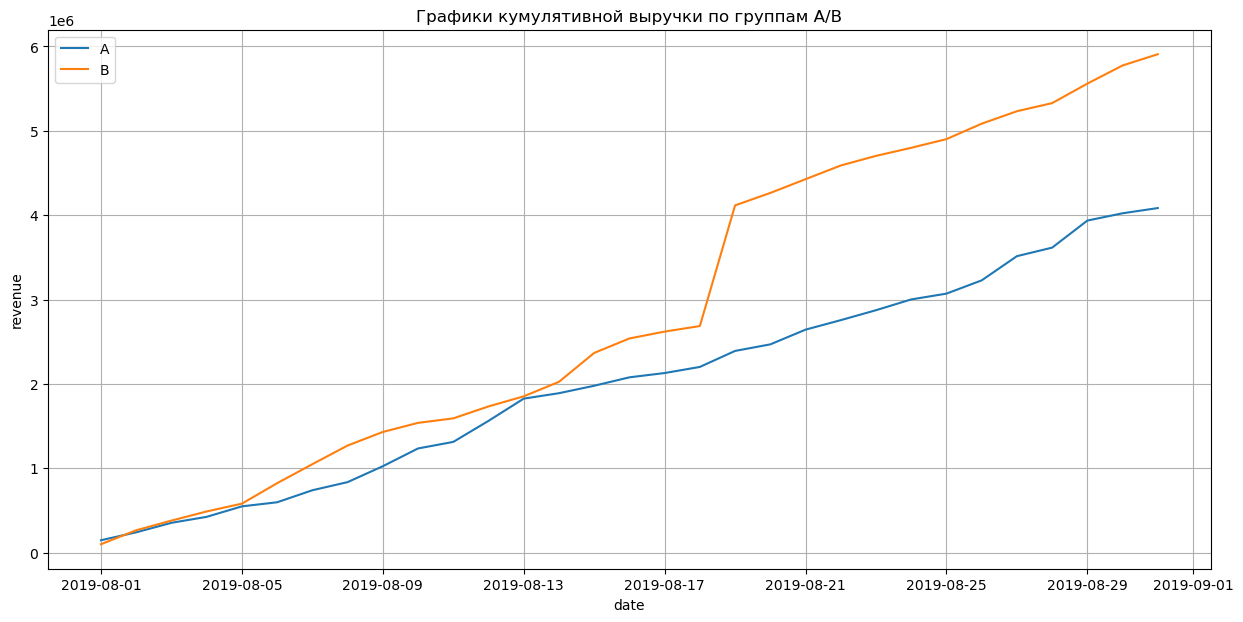

In [63]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,7))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.grid()
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.xlabel('date')
plt.ylabel("revenue")
plt.legend() 
plt.show()

**Вывод:**
 - До определенного промежутка времени графики групп примерно были одинаковыми, затем заметен резкий скачек у группы В, возможно это говорит о какой-то большой покупке, также это может быть связано с большим числом заказов
 - Также выручка на протяжении всего теста растет в обеих группах

#### 4.2. График кумулятивного среднего чека по группам

Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

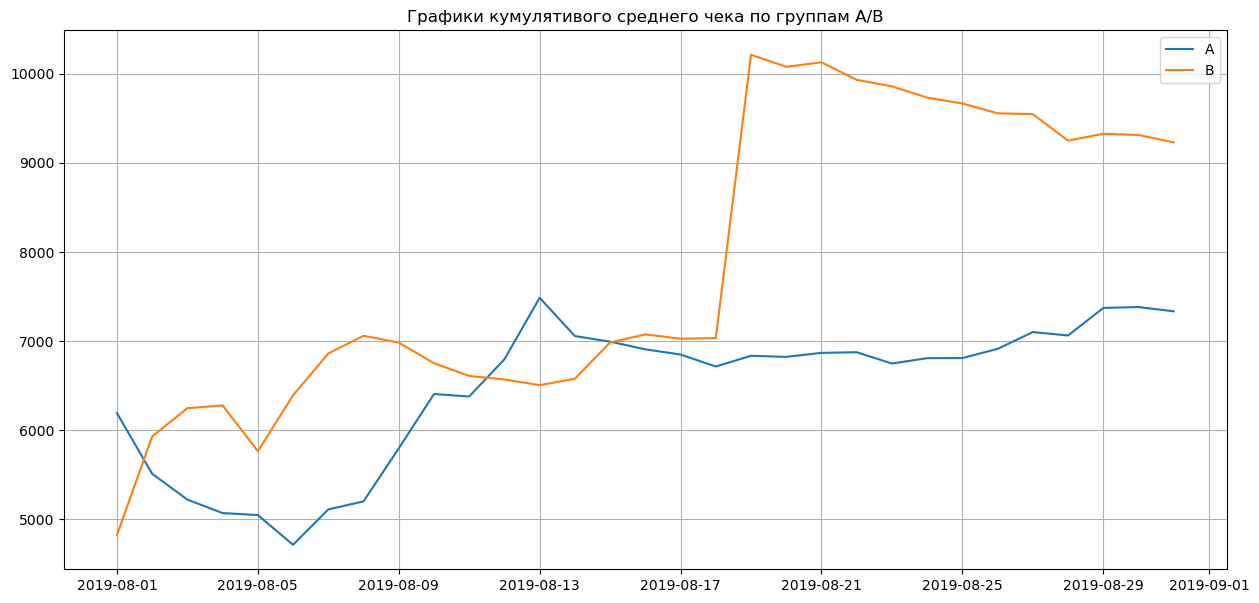

In [64]:
plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Графики кумулятивого среднего чека по группам A/B')
plt.grid()
plt.legend() 
plt.show()


**Выводы:**
 - Заметен, как и на прошлом графике резкий скачек в определенном моменте группы В
 - Также графики обеих групп изначально сильно скачат, что говорит о каких-то больших покупках в конкретные дни

#### 4.3. График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения

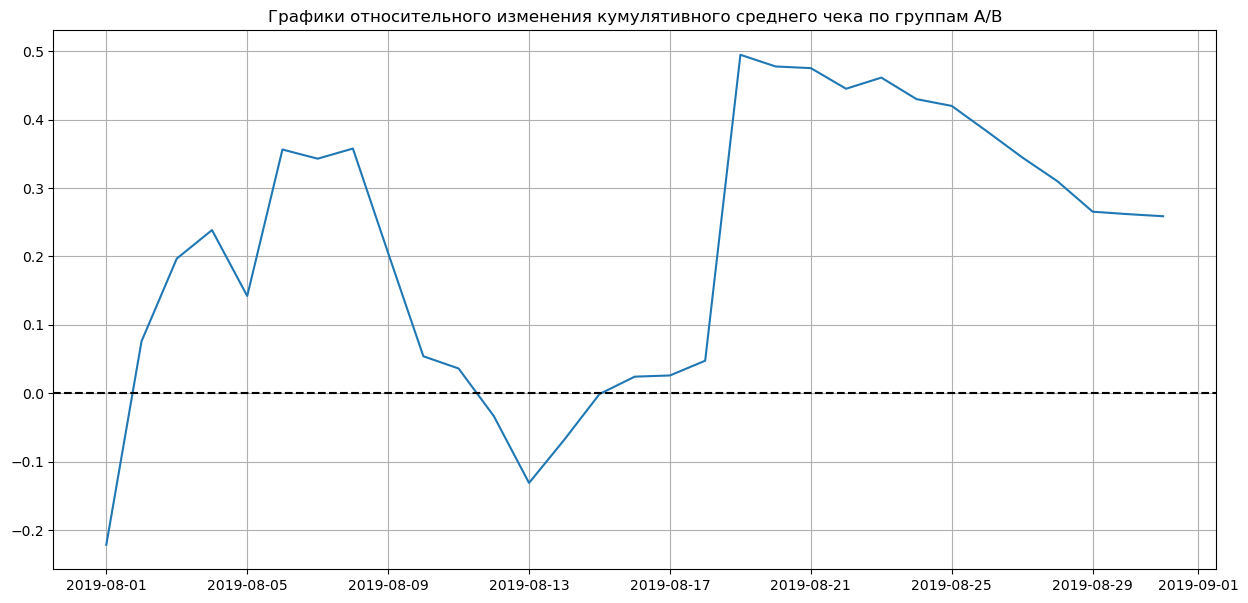

In [65]:
# собираем данные в одном датафрейме
plt.figure(figsize=(15,7))
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.grid()
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Графики относительного изменения кумулятивного среднего чека по группам A/B')
plt.show()

**Вывод:**
- Также и на этом графике подтвердились сильные колебания среднего чека, теперь точно стоит убедиться в наличии аномалий в данных

#### 4.4. График кумулятивного среднего количества заказов на посетителя по группам

Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения

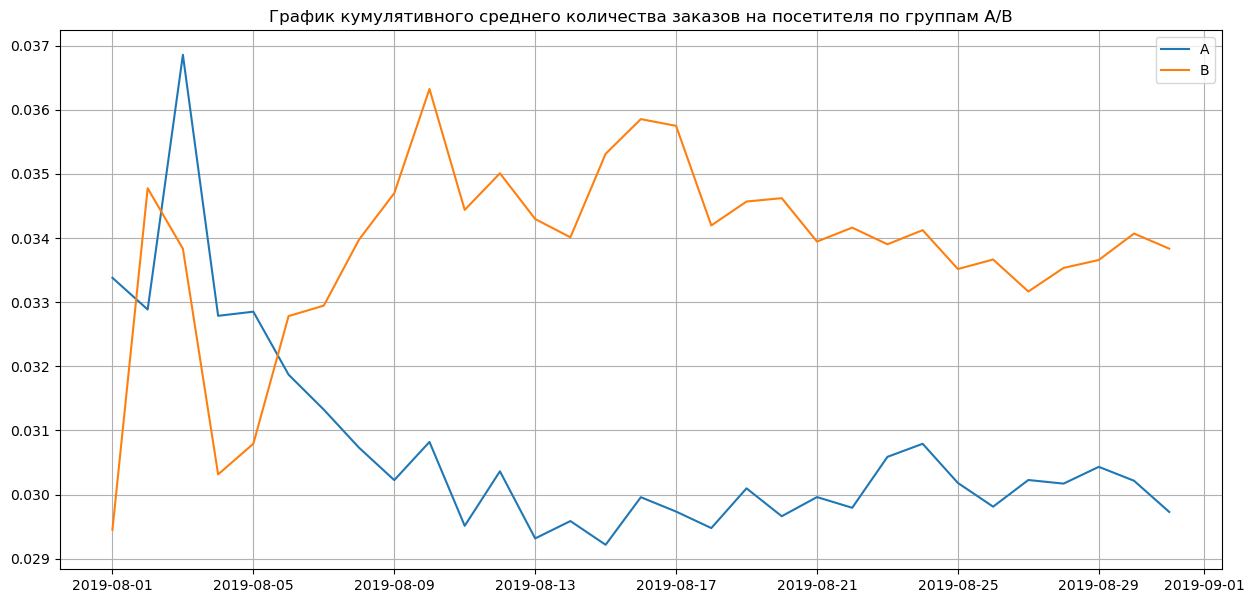

In [66]:
# считаем кумулятивную конверсию
plt.figure(figsize=(15,7))
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам A/B')
plt.show()

**Выводы:**
- Группа В, изначально имея меньшее отношение среднего количества заказов на посетителя сильными рывками смогла "обойти" группу А
- Изначальные данные сильно колеблются, стоит проверить на наличие выбросов и аномалий 

#### 4.5. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения

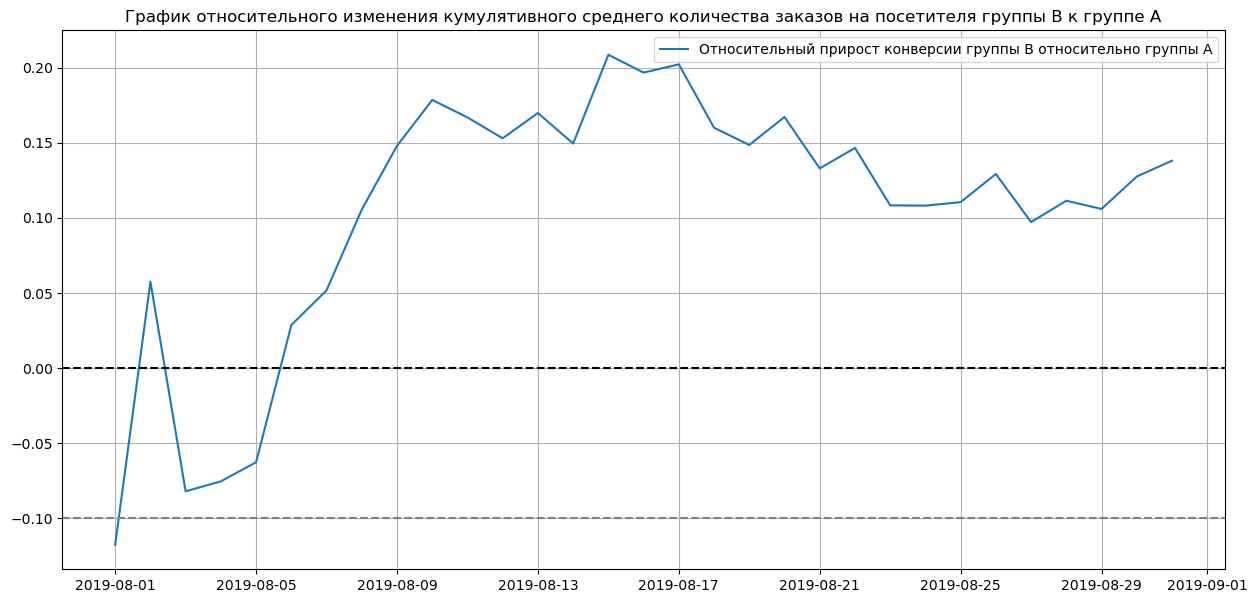

In [67]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.show()

**Выводы:**
- Кумулятивного среднее количества заказов на посетителя группы выше, как и ожидалось, у В
- Как и на прошлых графиках в начале все говорит о аномалиях и выбросах

#### 4.6. Точечный график количества заказов по пользователям

Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения

In [68]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

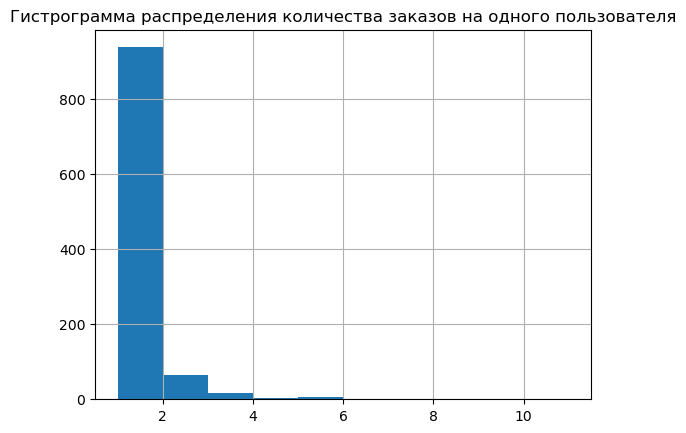

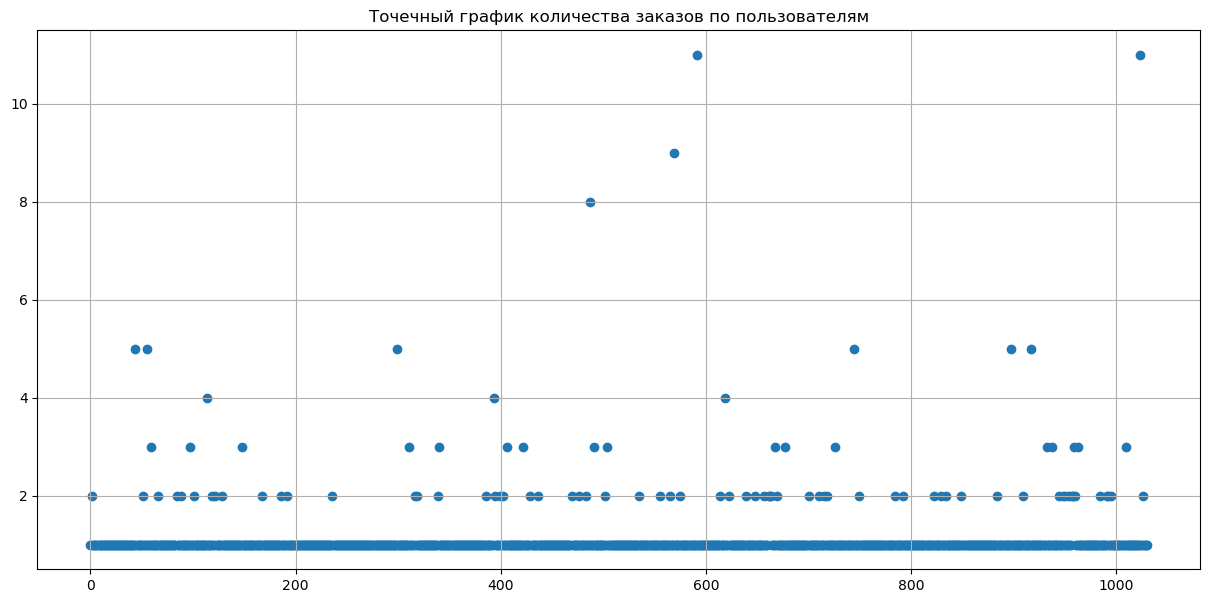

In [69]:
plt.hist(ordersByUsers['orders']) 
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.grid()
plt.show()
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,7))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.grid()
plt.title('Точечный график количества заказов по пользователям')
plt.show()


**Выводы:**
- Заметны единичные пользователи с большим количеством заказов начиная от 8
- Подавляющая часть останавливается на 1-2 заказах

#### 4.7. 95-й и 99-й перцентили количества заказов на пользователя

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [70]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print('Перцентили:\n95%: {}\n99%: {}'.format(percentiles[0],percentiles[1]))

Перцентили:
95%: 2.0
99%: 4.0


**Вывод:**
- Больше 2 заказов совершают только 5 процентов пользователей
- Больше 4 заказов совершает только 1 процент пользователей, думаю разумно выбрать эту границу и считать оставшиеся значения аномальными

#### 4.8.Точечный график стоимостей заказов

Построим точечный график стоимостей заказов. Сделаем выводы и предположения

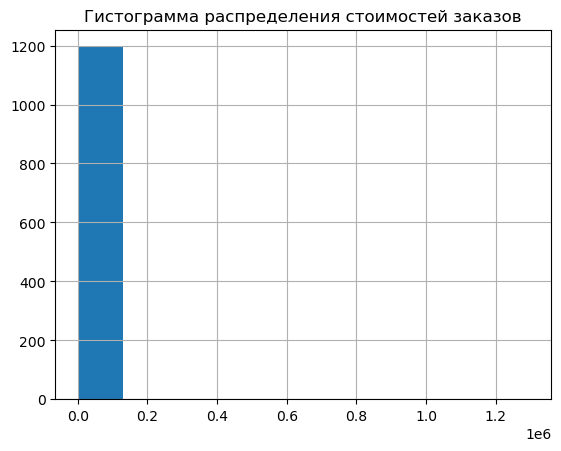

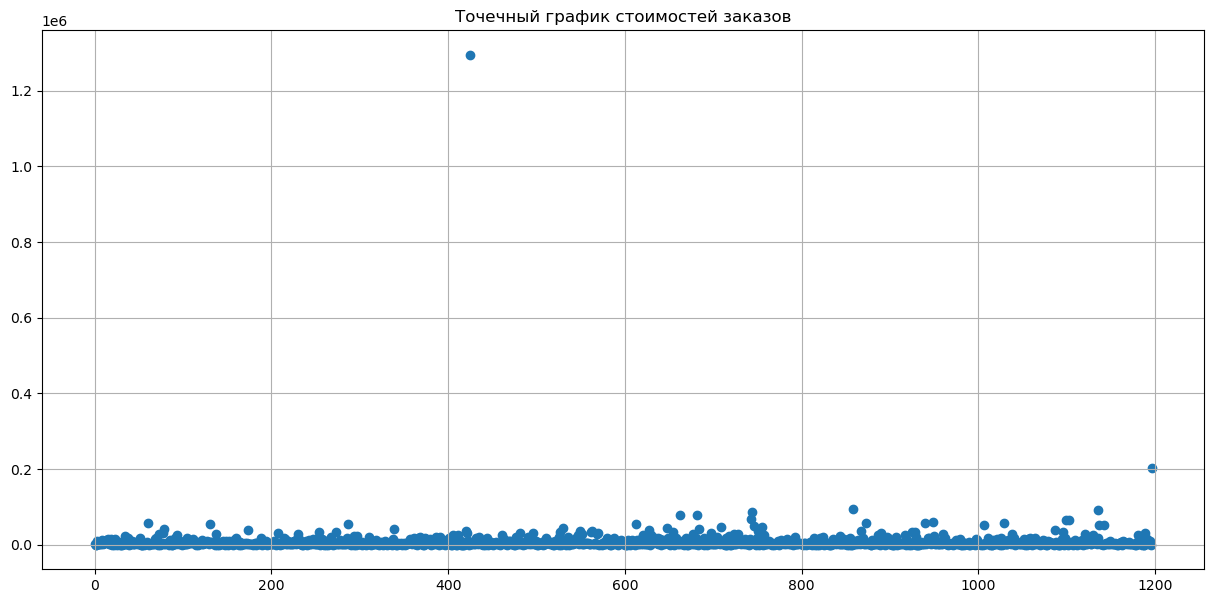

In [71]:

plt.hist(orders['revenue']) 
plt.title('Гистограмма распределения стоимостей заказов')
plt.grid()
plt.show()

plt.figure(figsize=(15,7))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.grid()
plt.show()

**Вывод:**
- Заметны единичные случаи с ценой заказа более 200 тысяч, большинство находится в промежутке до 50 тысяч

#### 4.9. 95-й и 99-й перцентили стоимости заказов

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [72]:
percentiles = np.percentile(orders['revenue'], [95, 99])
print('Перцентили:\n95%: {:.0f}\n99%: {:.0f}'.format(percentiles[0],percentiles[1]))

Перцентили:
95%: 28000
99%: 58233


**Вывод:**
- Только 5 процентов пользователей совершили покупки на сумму более 28000 тысяч
- Лишь 1 процент потратил сумму свыше 58000 тысяч, думаю значения выше этого можно считать аномальными

#### 4.10. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения

In [73]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Установим нулевую и альтернативную гипотезу по конверсии:
- Если results.pvalue < alpha, то разницы в конверсии нет, нулевую гипотезу нельзя отвергнуть и рассматривать альтернативную

Установим нулевую и альтернативную гипотезу по среднему количеству заказов:
- Нулевая: различий в данных по среднему количеству заказов нет
- Альтернативная: различия в данных по конверсии есть

In [74]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(sp.stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
alpha = 0.05
results = sp.stats.mannwhitneyu(sampleA, sampleB)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По сырым данным раличий в конверсии групп A и B нет, нулевую гиптоезу нельзя отвергнуть')
else:
    print('По сырым данным в конверсии групп A и B разница статистически значима, нулевую гиптоезу можно отвергнуть')
    

0.017
0.138
P-value: 0.016792355056752608
По сырым данным раличий в конверсии групп A и B нет, нулевую гиптоезу нельзя отвергнуть


#### 4.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Установим нулевую гипотезу по среднему чеку:
- Нулевая: разницы в среднем чеке нет
- Альтернативная: разница в среднем чеке есть

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения

In [75]:
print('{0:.3f}'.format(sp.stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 
results = sp.stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По сырым данным разницы в средних чеках в группах A и B нет, нулевую гиптоезу нельзя отвергать')
else:
    print('По сырым данным разница в средних чеках в группах A и B статистически значима, нулевую гипотезу можно отвергнуть')

0.729
0.259
P-value: 0.7292909855432458
По сырым данным разница в средних чеках в группах A и B статистически значима, нулевую гипотезу можно отвергнуть


#### 4.12. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения

In [76]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58232]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
Name: visitor_id, dtype: int64
20


Всего 20 аномальных пользователей

Установим нулевую и альтернативную гипотезу по конверсии:
- Если results.pvalue < alpha, то разницы в конверсии нет, нулевую гипотезу нельзя отвергнуть и рассматривать альтернативную

In [77]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [78]:
print('{0:.3f}'.format(sp.stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 
results = sp.stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным раличий в конверсии групп A и B нет, нулевую гиптоезу нельзя отвергнуть')
else:
    print('По очищенным данным в конверсии групп A и B разница статистически значима, нулевую гиптоезу можно отвергнуть')
    

0.014
0.151
P-value: 0.013904990762429726
По очищенным данным раличий в конверсии групп A и B нет, нулевую гиптоезу нельзя отвергнуть


#### 4.13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения

Установим нулевую гипотезу по среднему чеку:
- Если results.pvalue < alpha, то разницы в средних чеках в группах A и B нет, нулевую гиптоезу нелья отвергнуть и рассматривать альтернативную

In [79]:
print(
    '{0:.3f}'.format(
        sp.stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 
print('P-value: {}'.format(results.pvalue))
results = sp.stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])

if results.pvalue < alpha:
    print('По очищенным данным разницы в средних чеках в группах A и B нет, нулевую гиптоезу нельзя отвергать')
else:
    print('По очищенным данным разница в средних чеках в группах A и B статистически значима, нулевую гипотезу можно отвергнуть')

0.959
-0.014
P-value: 0.013904990762429726
По очищенным данным разница в средних чеках в группах A и B статистически значима, нулевую гипотезу можно отвергнуть


#### 4.14. Решение по результатам теста

Примем решение по результатам теста и объясним его

**Выводы:**
- По очищенным и сырым данным разница в средних чеках в группах A и B есть, нулевую гиптоезу следует отвергнуть
- По очищенным и сырым  данным в конверсии групп A и B разница статистически не значима, нулевую гиптоезу нельзя отвергнуть

**Решение:**
- Пожалуй, стоит зафиксировать победу группы В, даже после фильтрации ее показатели конверсии среднего чека оказались выше, чем у группы А

## 5. Общий вывод

**В самом начале проекта мы:**

- ознакомились с первичным форматом данных

- выполнили предварительную оценку данных

**По ходу первоначального анализа было выявлено:**

- 3 датафрейма без пропусков

**Также было обнаружено:**

- неккректная запись столбцов, привели к нижнему регистру


**В ходе второй части работы была произведена:**

- изменили неккоректные названия солбцов

- изменили форматы ячеек с датой


**Приоритизация гиптоез третьей части дал возможность сделать выводы:**

- Гипотезы 3, 1, 5, 4 находятся в обоих случаях в самом низу рейтинга с существенным отрывом
- Объяснить разницу первых мест можно тем, что в RICE учитывается дополнительно параметр Reach, т.е. охват пользователей

**Установлены нулевая и альтернативные гипотезы по среднему чеку и конверсии:**

Установим нулевую и альтернативную гипотезу по конверсии:

- Если results.pvalue < alpha, то разницы в конверсии нет, нулевую гипотезу нельзя отвергнуть и рассматривать альтернативную

Установим нулевую гипотезу по среднему чеку:
- Если results.pvalue < alpha, то разницы в средних чеках в группах A и B нет, нулевую гиптоезу нелья отвергнуть и рассматривать альтернативную
 
**Четвертая часть с А/В тестом дала понять некоторые вещи:**
 - До определенного промежутка времени графики групп примерно были одинаковыми, затем заметен резкий скачек у группы В, возможно это говорит о какой-то большой покупке
 - Заметен, как и на прошлом графике резкий скачек в определенном моменте группы В
 - Также графики обеих групп изначально сильно скачат, что говорит о каких-то больших покупках в конкретные дни
 - Также подтвердились сильные колебания среднего чека, теперь точно стоит убедиться в наличии аномалий в данных
 - Группа В, изначально имея меньшее отношение среднего количества заказов на посетителя сильными рывками смогла "обойти" группу А
- Кумулятивного среднее количества заказов на посетителя группы выше, как и ожидалось, у В
- Заметны единичные пользователи с большим количеством заказов начиная от 8
- Подавляющая часть останавливается на 1-2 заказах
- Больше 2 заказов совершают только 5 процентов пользователей
- Больше 4 заказов совершает только 1 процент пользователей, думаю разумно выбрать эту границу и считать оставшиеся значения аномальными
- Заметны единичные случаи с ценой заказа более 200 тысяч, большинство находится в промежутке до 50 тысяч
- Только 5 процентов пользователей совершили покупки на сумму более 28000 тысяч
- Лишь 1 процент потратил сумму свыше 58000 тысяч, думаю значения выше этого можно считать аномальными
- По очищенным и сырым данным разница в средних чеках в группах A и B есть, нулевую гиптоезу следует отвергнуть
- По очищенным и сырым  данным в конверсии групп A и B разница статистически не значима, нулевую гиптоезу нельзя отвергнуть

**Решение по А/В тесту:**
- Пожалуй, стоит зафиксировать победу группы В, даже после фильтрации ее показатели конверсии среднего чека оказались выше, чем у группы А